In [83]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [72]:
num_threads = 5
os.environ["OMP_NUM_THREADS"] = "5"
os.environ["TF_NUM_INTRAOP_THREADS"] = "5"
os.environ["TF_NUM_INTEROP_THREADS"] = "5"
tf.config.threading.set_inter_op_parallelism_threads(num_threads)
tf.config.threading.set_intra_op_parallelism_threads(num_threads)
tf.config.set_soft_device_placement(True)

In [154]:
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

In [155]:
test_X.shape

(10000, 28, 28)

In [156]:
train_X = train_X.reshape(len(train_X)*28*28,)
test_X = test_X.reshape(len(test_X)*28*28,)

In [157]:
def to_my_shape(X):
    new_X = []
    for i in range(len(X)):
        color = X[i]
        new_X.append([color,color,color])
    return np.array(new_X)
            
new_test_X = to_my_shape(test_X)

In [158]:
# train_X = train_X.reshape(-1, 28,28, 1)
# test_X = test_X.reshape(-1, 28,28, 1)

In [159]:
test_X.shape, new_test_X.shape

((7840000,), (7840000, 3))

In [160]:
new_test_X = new_test_X.reshape(10000, 28,28, 3)

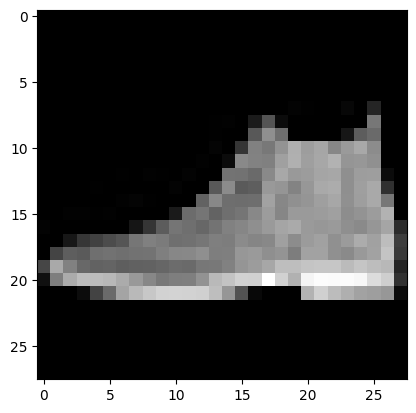

In [198]:
new_test_X.shape
plt.figure()
plt.imshow(new_test_X[0])

In [80]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [81]:
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [84]:
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [192]:
a = np.array([ [ [[11,11,11],[12,12,12]], [[21,21,21],[22,22,22]] ] ])
a

array([[[[11, 11, 11],
         [12, 12, 12]],

        [[21, 21, 21],
         [22, 22, 22]]]])

In [191]:
np.pad(a,((0, 0), (1, 0), (1, 0), (0, 0)))

array([[[[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        [[ 0,  0,  0],
         [11, 11, 11],
         [12, 12, 12]],

        [[ 0,  0,  0],
         [21, 21, 21],
         [22, 22, 22]]]])

In [196]:
nn_X = np.pad(new_test_X,((0, 0), (4, 0), (4, 0), (0, 0)))

In [197]:
new_test_X.shape, nn_X.shape

((10000, 28, 28, 3), (10000, 32, 32, 3))

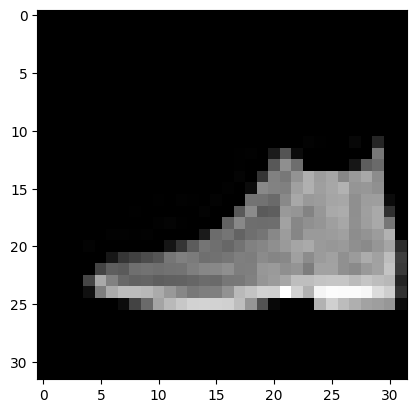

In [199]:
plt.figure()
plt.imshow(nn_X[0])